## Support Vector Machines

In this assignment we are working on building support vector machine models of SVC(support vector classifier) and SVR(Support vector regression) and understand the performance of the model with different type of SVM modelling

In [ ]:
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

Import the data file

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab/Datasets/BostonHousing_full.csv')

In [ ]:
data_raw  = pd.DataFrame.from_records(data)
data_raw.info()

We see that the column CATMEDV is our response variable and now we will build an SVM Model to classify all incoming data to either high or low MEDV.
MEDV is the Median value of owner-occupied homes and in our dataset we consider a threshold value and categorize the median value into "high" or "low"

##Exploratory Data Analysis

We now perform statistical analyses and data visualization to understand our feature variables and how they respond with respect to the MEDV high or low

Before we do that, we first check the data for missing values 

In [ ]:
data_raw.isna().sum()

No missing values

We then convert the categorical variable CATMEDV to a numerical variable by encoding h

In [ ]:
data_raw['CATMEDV'].replace('high',1,regex=True, inplace = True)
data_raw['CATMEDV'].replace('low',0,regex=True, inplace = True)
data_raw.head()

In [ ]:
data_raw['CATMEDV'].astype(str).astype(int)
data_raw.info()

## 1. Perform a 10-fold Cross-Validation for SVC

We set the target and response variables from our 

In [ ]:
#Set our features and response variables
X = data_raw.loc[:, ~data.columns.isin(['CATMEDV'])]  #Storing features in X
y = data_raw['CATMEDV'] #Storing the response variable to be classified in y
y=y.astype('int')


NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

#Creating the SVC Model with pipeline after transforming the features 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

svc_pipe=Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('svc', SVC(C=[1, 5, 10, 50, 100, 500, 1000], kernel='linear'))])
param_grid = {'svc__C':[1, 5, 10, 50, 100, 500, 1000],'svc__gamma':[1,0.1,0.01,0.001,0.0001], 'svc__kernel':['linear']}
grid_search = GridSearchCV(svc_pipe, param_grid, cv=10, scoring="neg_mean_squared_error")
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(C=[1, 5, 10, 50, 100, 500, 1000],
                                            kernel='linear'))]),
             param_grid={'svc__C': [1, 5, 10, 50, 100, 500, 1000],
                         'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svc__kernel': ['linear']},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'svc__C': 10, 'svc__gamma': 1, 'svc__kernel': 'linear'}

In [ ]:
grid_search.best_score_

-0.034756097560975606

In [ ]:
grid_search.best_estimator_.steps[-1][1].coef_

array([[-2.68749584e-03,  1.33893960e+00, -1.71983098e+00,
         4.92135935e-01,  9.06778532e-01,  7.75172020e+00,
        -4.80217421e-01, -2.36382956e+00,  2.03181971e+00,
        -1.05154617e+00, -1.46294779e+00,  5.51155599e-01,
        -8.30430212e+00]])

In [ ]:
import math
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
pred_y=grid_search.predict(X)

#score=grid_search.score(X,y)
#print(score)

mse=mean_squared_error(y, pred_y)
#print("Mean Squared Error:",mse)
rmse=math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mse=mean_absolute_error(y, pred_y)
#mse=mean_absolute_error(y, pred_y, multioutput='raw_values')
print("Mean Absolute Error:",mse)

Root Mean Squared Error: 0.19377669394079491
Mean Absolute Error: 0.037549407114624504


In [ ]:
import math
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
pred_y=grid_search.predict(x_test)


from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_y)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

[[76  2]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        78
           1       0.90      0.75      0.82        24

    accuracy                           0.92       102
   macro avg       0.91      0.86      0.88       102
weighted avg       0.92      0.92      0.92       102



We see that the Accuracy of our SVC is 92% and low MSE of 3.8%. F1 score, precision and recall are all showing high numbers for both high and low classifiers, thereby making it a good model.

##2. Build an SVR model, Plot the data, SVR and regression models

We now load the Salary.arff file into colab and perform SVR modelling

In [ ]:
from scipy.io import arff
data, meta = arff.loadarff('/content/drive/MyDrive/Colab/Datasets/salary1.arff')
data

array([(10., 33.), (12., 36.), (12., 50.), (13., 51.), (14., 42.),
       (14., 45.), (15., 59.), (16., 49.), (16., 60.), (17., 72.),
       (18., 69.), (20., 77.)],
      dtype=[('education', '<f8'), ('salary', '<f8')])

In [ ]:
raw_data = pd.DataFrame.from_records(data)

raw_data

,education,salary
0,10.0,33.0
1,12.0,36.0
2,12.0,50.0
3,13.0,51.0
4,14.0,42.0
5,14.0,45.0
6,15.0,59.0
7,16.0,49.0
8,16.0,60.0
9,17.0,72.0


In [ ]:
x=raw_data['education']
y=raw_data['salary']

In [ ]:
#Reshaping the x and y variables to 2D array
x=x.array.reshape(-1,1)
y=y.array.reshape(-1,1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#Building SVR Model
parameters = {'kernel':['linear','rbf','polynomial'],'C':[1,5,10,50,100,500,1000], 'epsilon':[0.05, 0.1, 0.15, 0.2]}
svr = SVR()
model = GridSearchCV(svr, parameters)
model.fit(x,y)
svr.fit(x,y)
model.best_params_

{'C': 100, 'epsilon': 0.2, 'kernel': 'linear'}

In [ ]:
model.best_score_

-0.4916016591994036

Text(0, 0.5, 'salary')

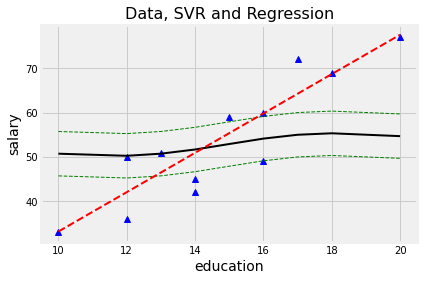

In [ ]:
# Plot the data, SVR and regression models
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x, y, 'b^') # data; 'g^' for blue triangle

y_svr = svr.predict(x)
plt.plot(x, y_svr+5, 'g--', linewidth=1) # upper margin line; green dash
plt.plot(x, y_svr, 'k-', linewidth=2) # svr model line; black solid
plt.plot(x, y_svr-5, 'g--', linewidth=1) # lower margin line; green dash

y_reg = model.predict(x)
plt.plot(x, y_reg, 'r--', linewidth=2) # regression line; red dash

plt.title('Data, SVR and Regression', fontsize=16)
plt.xlabel('education', fontsize=14)
plt.ylabel('salary', fontsize=14)

Finally see the SVR denoted by the black line and the green dotted lines denoting the decision boundary with the hyperplane parameters a as + and - 5.

## 3. Weighted Nearest Neighbor Model

Weighted k-nearest neighbors (k-NN) classification algorithm is a relatively simple technique to predict the class of an item based on two or more numeric predictor variables. 

In weighted kNN, the nearest k points are given a weight using a function called as the kernel function. The intuition behind weighted kNN, is to give more weight to the points which are nearby and less weight to the points which are farther away

For example, you might want to predict the political party affiliation (democrat, republican, independent) of a person based on their age, annual income, gender, years of education and so on. 

In Python we use the sklearn.neighbors.KNeighborsClassifier library to call the KNN classifier and the syntax is as below-
KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

Where in weights- we denote either uniform or distance. In distance, closer neighbors of a query point will have a greater influence than neighbors which are further away
W can also set weights- callable where callable is a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.